In [1]:
import xarray as xr
import numpy as np
import pandas as pd

from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

import sys
sys.path.append('/home/548/cd3022/aus-historical-solar-droughts/code/python/scripts')
import utils_V2

In [10]:
drought_counts = xr.DataArray(np.zeros([103, 1155, 913]), dims=("time", "latitude", "longitude"))
time_coord = [t.time() for t in pd.date_range(start="18:30", periods=103, freq="10min")]
drought_counts = drought_counts.assign_coords(time = time_coord)
drought_counts = drought_counts.assign_coords(time=[t.strftime("%H:%M:%S") for t in drought_counts.time.values])

In [11]:
first = '1-1-2020'
days_per_batch = 5
num_batches = 6

first_dt = datetime.strptime(first, "%d-%m-%Y")
dates = []
for x in range(num_batches):
    start_dt = first_dt + relativedelta(days = days_per_batch * x)
    start_date = start_dt.strftime("%d-%m-%Y")
    end_dt = start_dt + relativedelta(days = days_per_batch) - relativedelta(days=1)
    end_date = end_dt.strftime("%d-%m-%Y")
    dates.append((start_date, end_date))
    print(start_date, '      ', end_date)

01-01-2020        05-01-2020
06-01-2020        10-01-2020
11-01-2020        15-01-2020
16-01-2020        20-01-2020
21-01-2020        25-01-2020
26-01-2020        30-01-2020


In [12]:
for start, end in dates:
    data = xr.open_dataarray(f'/g/data/er8/users/cd3022/solar_drought/REZ_tilting/ideal_ratio/drought_heatmap/{start}___{end}___0.1.nc')
    drought_counts += data

In [13]:
data = drought_counts.where(drought_counts != 0, np.nan)

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>


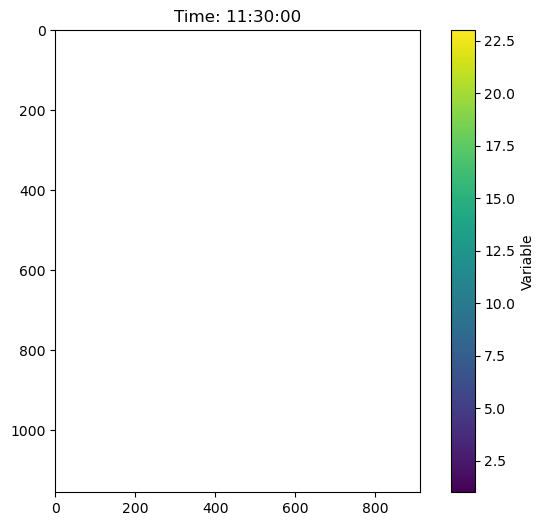

In [14]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
cmap = plt.cm.viridis  # Choose a colormap
vmin, vmax = np.nanmin(data), np.nanmax(data)  # Normalize color scale

# Create the initial plot (first frame)
img = ax.imshow(data.isel(time=0), cmap=cmap, vmin=vmin, vmax=vmax)
ax.set_title(f"Time: {data.time.values[0]}")  # Set initial title
plt.colorbar(img, ax=ax, label="Variable")

# Function to update the frame
def update(frame):
    img.set_array(data.isel(time=frame))  # Update data
    ax.set_title(f"Time: {data.time.values[frame]}")  # Update title
    return img,

# Create animation
ani = animation.FuncAnimation(fig, update, frames=103, interval=200, blit=False)

# Save as a video (MP4) or GIF
# ani.save("animation.mp4", writer="ffmpeg", dpi=150)  # Save as MP4
ani.save("animation.gif", writer="pillow", dpi=150)  # Save as GIF

# Show animation inline (if using Jupyter Notebook)
plt.show()
plt.close(fig)